<a href="https://colab.research.google.com/github/gabrielnd312/Churn-Prediction-With-Machine-Learning/blob/main/Churn_Prediction_With_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><left>
  <a href = "https://github.com/gabrielnd312"><img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" target="_blank"></a>
  <a href="https://www.linkedin.com/in/gabriel-duarte-671074146/" target="_blank"><img src="https://img.shields.io/badge/-LinkedIn-%230077B5?style=for-the-badge&logo=linkedin&logoColor=white" target="_blank"></a>
  <a href="https://medium.com/@gabrielnduarte" target="_blank"><img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white"></a>
<left></div>

#**Churn Prediction With Machine Learning**



<left><img width="70%" src="https://images.unsplash.com/photo-1556889487-b6f8d3fc728b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1890&q=80"></left>



`Churn rate`, also known as customer attrition or customer turnover, is a vital metric for businesses that measures the percentage of **customers who cease their engagement or subscription with a company** over a specific period.

We can exemplify with a `streaming service company`, the churn analysis is done on top of subscribers who canceled the service in a given period analyzed.

<left><img width="90%" src="https://images.unsplash.com/photo-1574375927938-d5a98e8ffe85?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=869&q=80"></left>

This period can be varied, in week, month, bimonthly, half-yearly, annual or other options.

This metric helps companies gauge the health of their customer base and the effectiveness of their `customer retention strategies`.

Understanding churn rate is **crucial** because it directly impacts a company's revenue and growth potential.

<left><img width="70%" src="https://images.unsplash.com/photo-1579621970563-ebec7560ff3e?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=871&q=80"></left>

**A high churn rate** indicates that a significant number of customers are leaving, potentially leading to a decline in revenue. On the other hand, **a low churn rate** signifies strong customer loyalty and a stable revenue stream.

By analyzing churn rate and its associated factors like customer satisfaction, engagement, and loyalty, companies can make informed decisions to enhance their products, services, and customer support. Churn prediction and management strategies can be developed to proactively address issues and improve customer retention. Ultimately, keeping churn rate in check fosters sustainable growth and strengthens a company's competitive position in the market.


<left><img width="70%" src="https://images.unsplash.com/photo-1560221328-12fe60f83ab8?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=874&q=80"></left>

# We will start our analysis and model creation by importing the necessary packages

In [ ]:
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import locale

We have imported many packages that will be useful in our work.

First basic libraries for exploratory analysis and graphical visualization like `"pandas"`, `"matplotlib"`, `"numpy"` and `"seaborn"`.

We also include model metrics, evaluation and performance measurement.


We include methods of normalization and standardization of our data focusing on better model performance.

In [ ]:
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

**We will start the work by understanding the data.**

The most important thing in a predictive model is to first understand `why it exists` and what insights we want to extract from it.


In a data set we can check a lot of different information, and with that, it's easy to not be able to identify the **right questions** to extract the **information we need**.

Without understanding the context of the data we work with, it will be difficult for us to work effectively and create a really useful model.

<left><img width="70%" src="https://images.unsplash.com/photo-1615557854978-2eac0cd47b0d?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=870&q=80"></left>


To perform our `feature engineering` and `feature selection` to optimize the model, we need to identify which variables will have greater or lesser importance within our target.

In [ ]:
df = pd.read_csv ("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")


df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
print("Columns names:\n\n", list(df.columns))

Columns names:

 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


**Right**, we import the packages that will be needed and also our dataset.

We checked the first and last entries and we could understand more about the data we are going to work with, how they are divided, their categorical variables and more.

To facilitate understanding and make accessing specific information easier in the future, a **dictionary of features** has been included below:

#**Dictionary of Variables**

`customerID` ---> Unique value that identifies the customer.

`gender` ---> Customer's gender

`SeniorCitizen` --->  Indicates if the customer is 65 or older.

`Partner` --->   Indicate if the customer has a partner.

`Dependents` --->  Indicates if the customer lives with any dependents.

`Tenure` --->  Indicates the total amount of months that the customer has been with the company.

`PhoneService` --->  Indicates if the customer subscribes to home phone service with the company.

`MultipleLines` ---> Indicates if the customer subscribes to multiple telephone lines with the company.

`InternetService` --->  Indicates if the customer subscribes to Internet service.

`OnlineSecurity` --->  Indicates if the customer subscribes to an additional online security service provided by the company.

`OnlineBackup` --->  Indicates if the customer subscribes to an additional online backup service.

`DeviceProtection` --->  Indicates if the customer subscribes to an additional device protection plan for their Internet equipment.

`TechSupport` --->  Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times.


`StreamingTV` --->  Indicates if the customer uses their Internet service to stream television programing from a third party provider.

`StreamingMovies` --->  Indicates if the customer uses their Internet service to stream movies from a third party provider.

`Contract` --->  Indicates the customer's current contract type.

`PaperlessBilling` --->  Indicates if the customer has chosen paperless billing.

`PaymentMethod` --->  Indicates how the customer pays their bill.

`MonthlyCharges` --->   Indicates the customer's current total monthly charge for all their services from the company.

`TotalCharges` --->  Indicates the customer's total charges.

`Churn` --->   1 = the customer left the company this quarter. 0 = the customer remained with the company.



Starting our *exploratory analysis itself*, one of the most important things to consider is the `missing values`.

When there are missing values ​​in our database it is a problem, and it is critical to know that not all missing data can be treated or filled in the same way.

<left><img width="55%" src="https://images.unsplash.com/photo-1470790376778-a9fbc86d70e2?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=404&q=80"></left>

`We must identify some information before:`

If it's data from a categorical variable, if not numerical data, if the missing data means something or if it's just the lack of information...among many other specific scenarios that vary from case to case.

In [ ]:
#checking for missing values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We initially identified that there is `no missing value in our dataset`, as we have a very complete database.

But the analysis must go in deeper terms to verify if some information that should be missing was filled in with some "placeholder" that doesn't tell us anything.

In [ ]:
#Unique values ​​per column:
print("Unique values per column:\n", df.nunique())

Unique values per column:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


We can see that most of the columns refer to categorical variables, where each one has a value to fit the situation of a customer/subscriber.

The other variables with more information in each refer to more customized data, such as the time the consumer subscribes to the service.

It could be done in categories like:

`- less than a year`

`- more than 1 year`

`- more than 3 years`


However, this dateset is more exact information that varies according to the time of each client.

The information contained in `Monthly Charges` and `Total Charges` also has these characteristics.

In [ ]:
print("Balance by gender: \n\n", (df["gender"].value_counts()).to_string())
print("\n\n")
print("% by gender: \n\n", ((df["gender"].value_counts() / len(df) *100)).apply(lambda x: f'{x:.1f}%').to_string())

Balance by gender: 

 Male      3555
Female    3488



% by gender: 

 Male      50.5%
Female    49.5%


In [ ]:
def convert_str_float(entry):
  try:
    return float(entry)
  except ValueError:
    return np.nan

In [ ]:
df_clean = df.copy()
df_clean.drop("customerID", axis=1, inplace=True)

df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(convert_str_float)

print("Missing Data in 'TotalCharges' before: \t{}\n".format(df_clean["TotalCharges"].isnull().sum()))

#Add median value to missing values ​​in "TotalCharges"
TotalChargesMedian = df_clean.TotalCharges.median()

df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

print("Missing Data in 'TotalCharges' after: \t{}\n".format(df_clean["TotalCharges"].isnull().sum()))

Missing Data in 'TotalCharges' before: 	11

Missing Data in 'TotalCharges' after: 	0




As stated above, in the "TotalCharges" column we found some values ​​that were filled in in a way other than leaving them blank.

This information could disturb us later and that is why these values ​​were identified and filled in with the median.


`Before there were 11 missing values.`

Now, with the data treated, `0 missing values.`

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


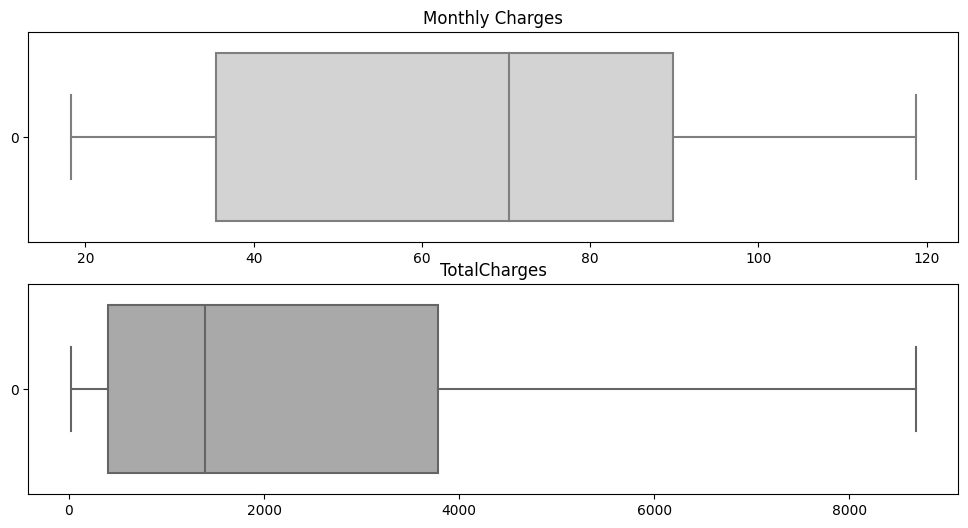

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

sns.boxplot(df_clean["MonthlyCharges"], color="lightgrey", ax=ax[0], orient = "h")
sns.boxplot(df_clean["TotalCharges"], color="darkgrey", ax=ax[1], orient="h")
ax[0].set_title("Monthly Charges")
ax[1].set_title("TotalCharges")

plt.show()


This `boxplot` type graph helps us to understand the quadrants of our database.


The most relevant information that we can extract at this point is that there are no values ​​so different as to be classified as outliers.

<left><img width="70%" src="https://www.feedz.com.br/blog/wp-content/uploads/2021/07/o-que-e%CC%81-um-outlier.webp"></left>

`Outliers`, if in large numbers or very different, can compromise the accuracy of our averages, sums, and calculations. **As well as confusing our Machine Learning model.**

Therefore, the lack of outliers is positive information.

Text(0, 0.5, 'Representation')

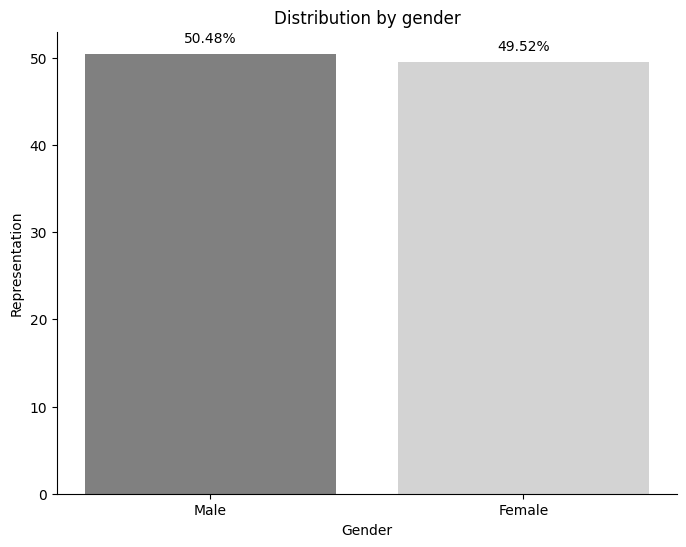

In [ ]:
#organizing the data

gender_counts = df["gender"].value_counts()
total_entries = len(df)
gender_percentages = gender_counts / total_entries *100

colors = ["grey", "lightgrey"]

plt.figure(figsize=(8,6))
bars = plt.bar(gender_percentages.index, gender_percentages.values, color=colors)

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval+1, f'{yval:.2f}%', ha="center", va="bottom", color="black")

#customization
plt.tick_params(top=False, right=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.title('Distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Representation')



Earlier we checked the `balance between gender-related information`, but here we can demonstrate it visually in a graph.

This way it is easy to see that the data is balanced and there is no relevant difference between them.

In [ ]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

"MultipleLines" indicates if the customer subscribes to multiple telephone lines with the company.

We can then verify that the majority of customers `do not have multiple lines`, at most one or none.

We must relate this information to additional analysis, as it is common for customers who have more services with the company **to be more afraid of canceling their services**.

There is greater dependency and greater effort to replace used services with one or more companies.

When only one service is used, this replacement with another company in the market is easier and more agile, removing a barrier to possible churn.

In [ ]:
print("Type of service offered:\n", (df["InternetService"].value_counts()).to_string(),"\n\n")


print("Most used service:\n",(df["InternetService"].describe()).to_string())

Type of service offered:
 Fiber optic    3096
DSL            2421
No             1526 


Most used service:
 count            7043
unique              3
top       Fiber optic
freq             3096


In [ ]:
print("Users with tech support: \n\n", (df["TechSupport"].value_counts()).to_string())
print("\n\n")
print("% of users with tech support: \n\n", ((df["TechSupport"].value_counts() / len(df) *100)).apply(lambda x: f'{x:.1f}%').to_string())

Users with tech support: 

 No                     3473
Yes                    2044
No internet service    1526



% of users with tech support: 

 No                     49.3%
Yes                    29.0%
No internet service    21.7%


**Other relevant information.**

`Technical support` is yet another line of relationship `between customer and company`. And we identified that most customers do not have this type of service contracted.

Later we can **correlate the customers** who have or do not have the technical support service with the customers who canceled the subscription, that is, `churn`.

A priori, it is logical to think that customers who have more services and lines of relationship with the company will have greater difficulty canceling services.

<left><img width="50%" src="https://images.unsplash.com/photo-1521898284481-a5ec348cb555?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=387&q=80"></left>


Therefore, increasing the number of users who have the technical support subscription included in their services can `reduce the churn rate` in the medium and long term.

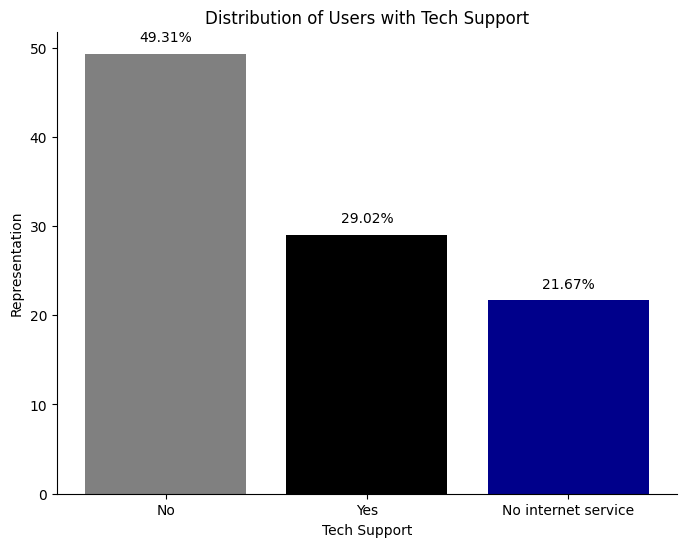

In [ ]:
tech_support_percentages = df["TechSupport"].value_counts() / len(df) * 100

# graph colors
colors = ['gray', 'black', "darkblue"]


plt.figure(figsize=(8, 6))
bars = plt.bar(tech_support_percentages.index, tech_support_percentages.values, color=colors)

# customization
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', color='black')


plt.tick_params(top=False, right=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.title('Distribution of Users with Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Representation')


plt.show()

In [ ]:
print("Description of contract term:\n",
    df["tenure"].describe(),"\n\n")

print("Number of customers with the longest contract period:\n\n",
      df["tenure"].value_counts(ascending=False).head(15))

Description of contract term:
 count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64 


Number of customers with the longest contract period:

 1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
Name: tenure, dtype: int64


Here we have the information about `the duration of the contract.`

It is interesting to note that the length of the contract varies between the minimum of `1 month` and the second largest entry of `72 months`.

In any case, we can also see that almost twice as many consumers with a 72-month contract `(362)` have a 1-month contract `(613)`.

Again, it is a type of negotiation that can impose more or less barrier for a client to give up your service.

<left><img width="70%" src="https://images.unsplash.com/photo-1603796846097-bee99e4a601f?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=774&q=80"></left>

If they have a **month-to-month** renewal, when they find it convenient, they can just not renew, or we must consider human error, and many can forget to renew, forget to change the payment method, leave free credit, among many others options.

In the case of a **long-term** renewal contract, it is more difficult for a customer to have the active attitude of canceling a contract that is already in place and working for him.

In terms of the company's negotiation and strategy, it is interesting that it offers special conditions and seeks to increase the number of long-term contracts among its clients.

In [ ]:
print(df["tenure"].dtype)
print(df["tenure"].isnull().sum())

int64
0


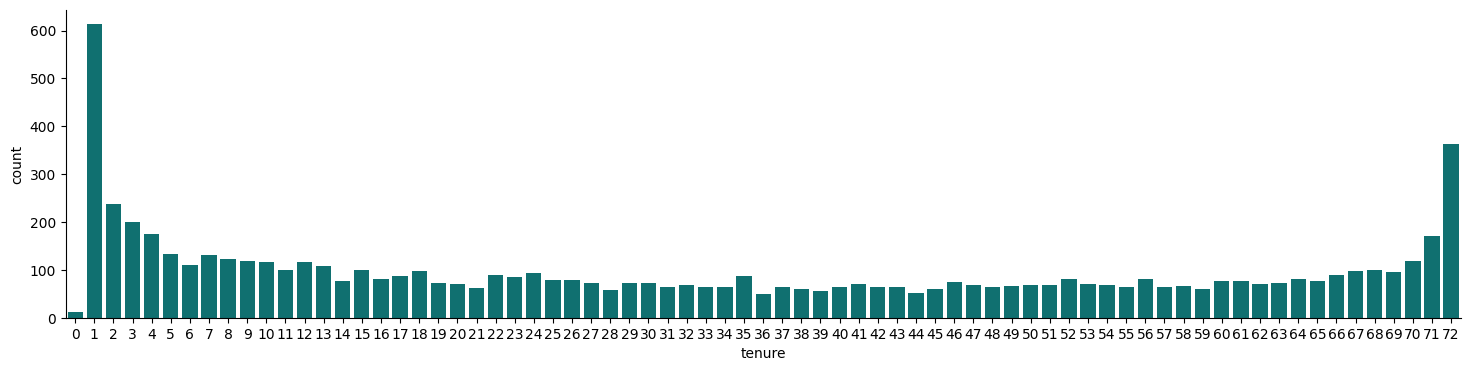

In [ ]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df_clean, x='tenure', color = "teal")
sns.despine()

plt.show()

With the graphical view of the contract time distribution, it is easy to check past information.

The largest number of contracts are in `month-to-month` renewal or in the largest type, `72 months`.


The remainder has a more even distribution among the other possibilities.

#**Correlation Matrix**


A correlation matrix is ​​a table that indicates the connection coefficients between factors. Each table cell shows the connection between the two factors.

A connecting grid is used to delineate information, as a contribution to further investigation, and as an indication for cutting-edge examinations.


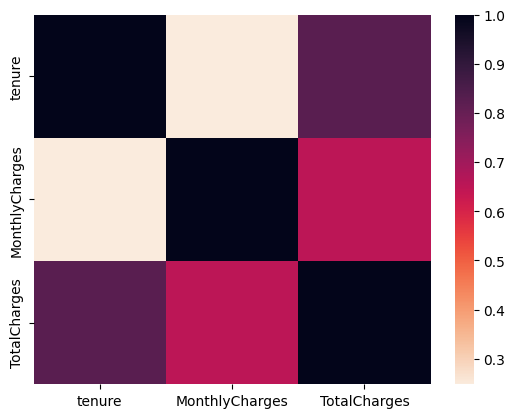

In [ ]:
df_corr = df_clean[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
sns.heatmap(df_corr, cmap="rocket_r")
plt.show()

With the help of the correlation matrix, we can identify a strong correlation between:

`"Tenure" -> "TotalCharges"`

This correlation is interesting because time is proportional to consumer spending.

The longer he is with the company, the more payments were made and the greater the added cost.

When checking:

`"tenure" -> "MonthlyCharges"`

The correlation is not expressive, since it is the general payment for the month, and in this case, it does not depend on whether the consumer has been with the company for a long time or not.

In [ ]:
print("Status of contracts:\n",
    df["Contract"].describe(),"\n\n")

print("Most used contract type:\n",
df["Contract"].value_counts(),"\n\n")

print("Percentage of values:\n",
df["Contract"].value_counts() / len(df) *100)

Status of contracts:
 count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object 


Most used contract type:
 Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64 


Percentage of values:
 Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64


In [ ]:
#Understanding the use of streaming services

print("Distribution:\n",
    df["StreamingMovies"].describe(),"\n\n",
    df["StreamingTV"].describe(),"\n\n")

print("Value Count:\n\n",
df["StreamingMovies"].value_counts(),"\n\n",
df["StreamingTV"].value_counts(),"\n\n")

print("Percentage of values:\n",
df["StreamingMovies"].value_counts() / len(df) *100,"\n\n",
df["StreamingTV"].value_counts() / len(df) *100)

Distribution:
 count     7043
unique       3
top         No
freq      2785
Name: StreamingMovies, dtype: object 

 count     7043
unique       3
top         No
freq      2810
Name: StreamingTV, dtype: object 


Value Count:

 No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64 

 No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64 


Percentage of values:
 No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: StreamingMovies, dtype: float64 

 No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: StreamingTV, dtype: float64


At that moment we got a lot of information regarding streaming.

Initially we identified that the values ​​in all cases between `"Yes"` and `"No"` are close, however, we have the extra information of `"No Internet Service"`.


We can interpret that, if the subscriber does not have the internet service, he also does not have the streaming service, which in this case represents:

No = `"No"` + `"No internet service"`

As a result, in the entries referring to the streaming service, all of them have a share of consumers below 50% and it is not balanced with the customers who have the service, with a significant difference.

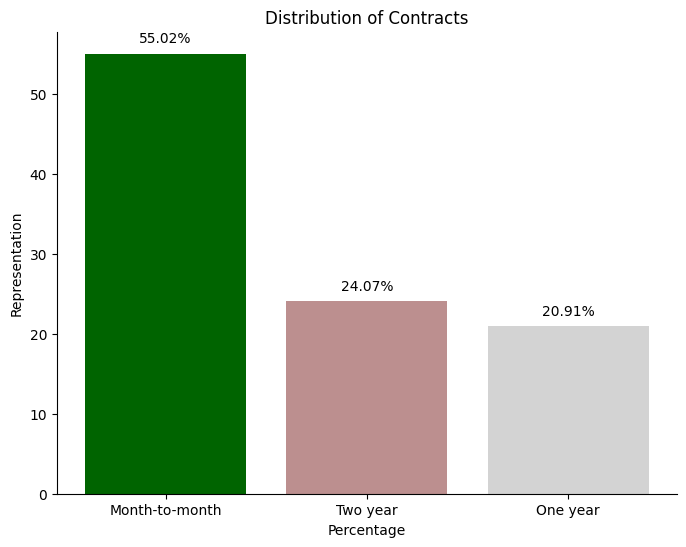

In [ ]:
contracts_percentages = df["Contract"].value_counts() / len(df) * 100


plt.figure(figsize=(8, 6))
bars = plt.bar(contracts_percentages.index, contracts_percentages.values, color = ["darkgreen","rosybrown","lightgray"])

# customization
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', color='black')


plt.tick_params(top=False, right=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.title('Distribution of Contracts')
plt.xlabel('Percentage')
plt.ylabel('Representation')


plt.show()

Regarding the duration of contracts, it is a similar situation, since with a smaller commitment, it is easier for a consumer to cancel services.

And in the company, more than `55% of subscribers` do not have long contracts, but month-to-month renewals.

## **Exploring the payment methods most used by customers**

In [ ]:
print("General information:\n", df["PaymentMethod"].describe(), "\n\n")

print("Most common payment method:\n", df["PaymentMethod"].value_counts(),"\n\n")

print("Percentage of values:\n", df["PaymentMethod"].value_counts() / len(df) * 100)

General information:
 count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object 


Most common payment method:
 Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64 


Percentage of values:
 Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64


<center><img width="70%" src="https://images.unsplash.com/photo-1628527304948-06157ee3c8a6?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2070&q=80"></center>

Initially we identified that the most used means of payment is the `"Electronic Check"`, however, adding the types of `automatic payments`, they occupy the first place.

In order to draw conclusions, we need to carry out some more in-depth studies, but we can assume that it is better for the company that the payment of subscriptions is made automatically, avoiding problems such as not receiving the bill, forgetfulness, or any other that may imply in some type of loss for the company.


And on the customer side, the automatic payment method is also interesting so you don't have to worry about it, and avoid having your service blocked due to forgetting or something like that.

In [ ]:
#replacing string information for binary information

df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# **Comparison of customers who Churn**

Within our line of research, in order to understand in depth aspects that may be important to avoid cancellation by customers, we must compare the main characteristics of customers who remain with the company, of customers who canceled service.

<center><img width="70%" src="https://images.unsplash.com/photo-1569803903286-eb86d49af323?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2052&q=80"></center>


Through this comparison, we can draw a closer profile of customers who tend to be more loyal to the company and stay longer, and customers who tend to cancel at some point in the near future.

With this information, strategies and decision-making can be designed to reverse situations of customers that are close to churn, such as sending facilities, bonus packages, free service offers for a limited time, among other strategies.

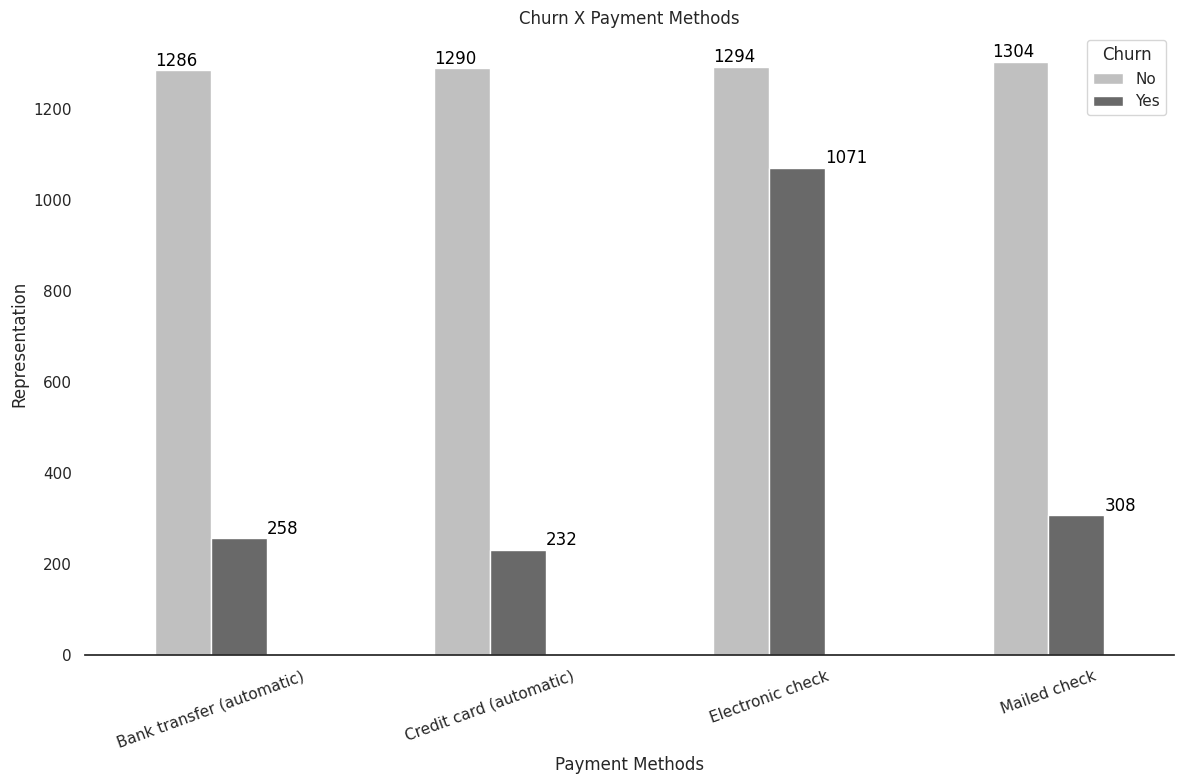

In [ ]:


# seaborn style
sns.set(style="white")

#graph plotting

churn_df = df.groupby(["PaymentMethod","Churn"]).size().unstack()
fig, ax = plt.subplots(figsize = (12,8))


churn_df.plot(kind='bar', stacked=False, color=['silver', 'dimgray'], width=0.4, ax=ax)


plt.title('Churn X Payment Methods')
plt.xlabel('Payment Methods')
plt.ylabel('Representation')


plt.legend(title='Churn', labels=['No', 'Yes'], loc="upper right")
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

plt.xticks(rotation=20)

# Adding value labels
for i, method in enumerate(churn_df.index):
    plt.text(i - 0.2, churn_df.loc[method, 0] + 10, str(churn_df.loc[method, 0]), color='black')
    plt.text(i + 0.2, churn_df.loc[method, 1] + 10, str(churn_df.loc[method, 1]), color='black')

plt.tight_layout()



**The information we can extract from this graph is interesting:**

Among customers who did not churn, the means of payment are well balanced, being at a `mathematically tied level.`

Therefore, this information does not tell us much to help in decision making.

<left><img width="30%" src="https://img.freepik.com/fotos-gratis/mao-segurando-multiplicacao-simbolo_53876-63751.jpg?w=360&t=st=1692899073~exp=1692899673~hmac=4775770156bebf5cdc2ba84fb95f439778f7947f34fc84289906488d63fa514d"></left>


The information starts to be valuable when we look at **the customers who churn.**

The difference between manual payment methods is very large, that is, **without an exit barrier**, the customer may just not make the payment and will be out of service.

Now, for automatic payments, this barrier makes a lot of difference in the churn rate, with the lowest values ​​associated with automatic payment methods:

`--> "BankTransfer"`

`--> "Credit Card"`

## **But for a report, what does that mean?**


<left><img width="70%" src="https://images.unsplash.com/photo-1531303435785-3853ba035cda?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2070&q=80"></left>

Well, it's important that we check all the scenarios together.

But it is wise to start strategizing with the planning and marketing team, to create interesting promotions and bonuses for `joining automatic payment methods.`

This measure can, in the long term, significantly reduce the company's churn rate, and **especially if related to the other characteristics studied by the data analyst.**

Examples of these special conditions could be:

`---> Discount on invoice for 6 months.`

`---> 3 extra free months of service`

`---> Adding an extra service like streaming or free technical support.`

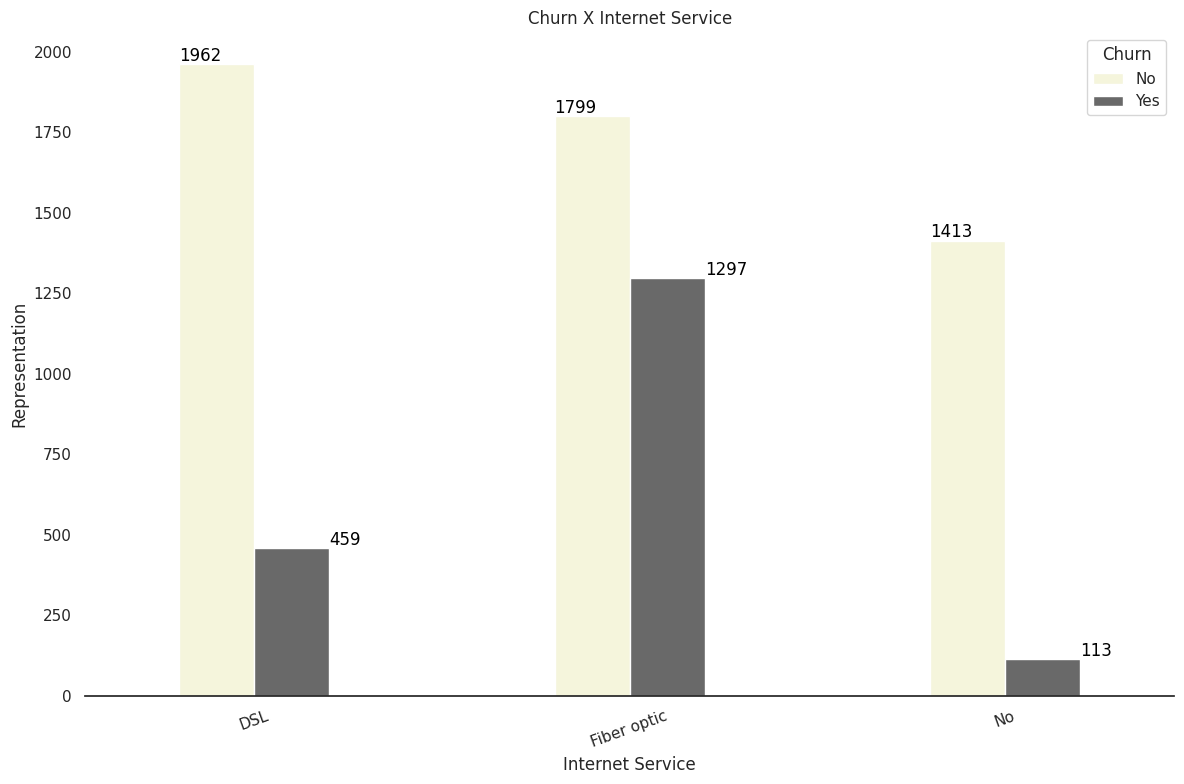

In [ ]:


# seaborn style
sns.set(style="white")

#graph plotting

iservice_df = df.groupby(["InternetService","Churn"]).size().unstack()
fig, ax = plt.subplots(figsize = (12,8))


iservice_df.plot(kind='bar', stacked=False, color=['beige', 'dimgray'], width=0.4, ax=ax)


plt.title('Churn X Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Representation')


plt.legend(title='Churn', labels=['No', 'Yes'], loc="upper right")

ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')


plt.xticks(rotation=20)

# Adding value labels
for i, method in enumerate(iservice_df.index):
    plt.text(i - 0.2, iservice_df.loc[method, 0] + 10, str(iservice_df.loc[method, 0]), color='black')
    plt.text(i + 0.2, iservice_df.loc[method, 1] + 10, str(iservice_df.loc[method, 1]), color='black')

plt.tight_layout()



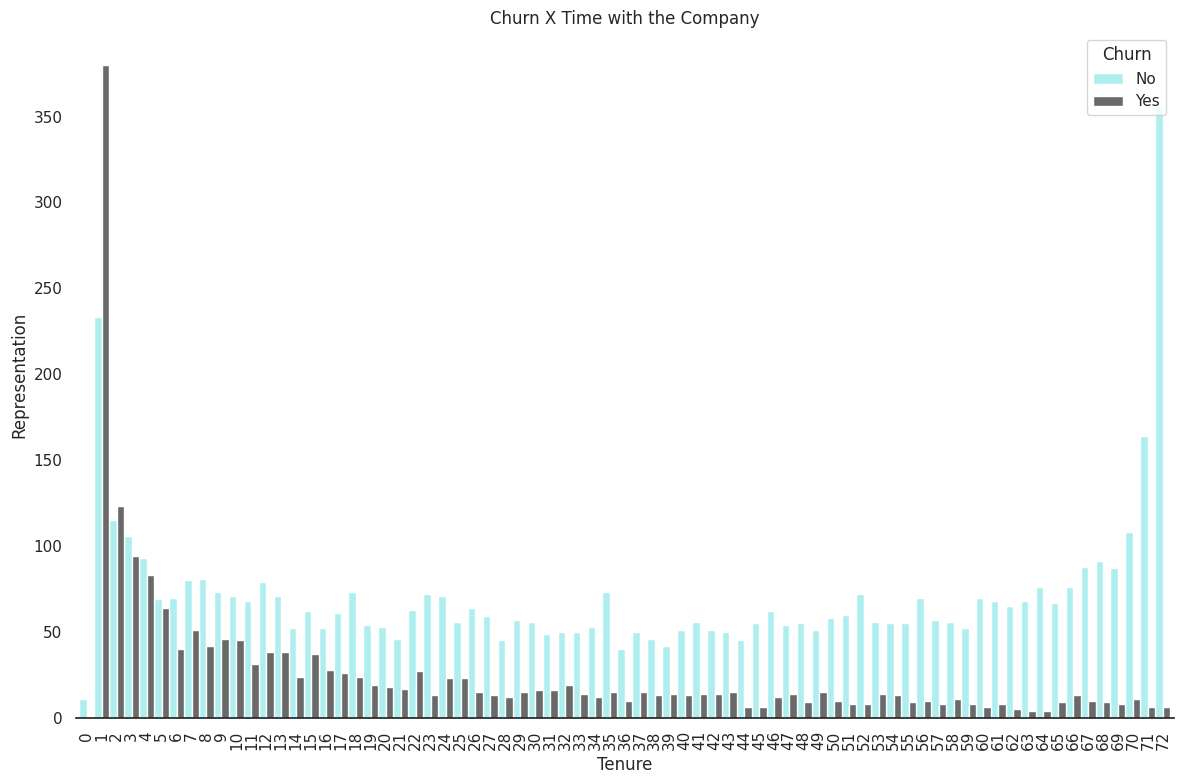

In [ ]:


# seaborn style
sns.set(style="white")

#graph plotting

tenurechurn_df = df.groupby(["tenure","Churn"]).size().unstack()
fig, ax = plt.subplots(figsize = (12,8))


tenurechurn_df.plot(kind='bar', stacked=False, color=['paleturquoise', 'dimgray'], width=1, ax=ax)


plt.title('Churn X Time with the Company')
plt.xlabel('Tenure')
plt.ylabel('Representation')


plt.legend(title='Churn', labels=['No', 'Yes'], loc="upper right")

ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')


plt.xticks(rotation=90)


plt.tight_layout()



`Customers who have a longer subscription tend not to cancel services.`

At least, that's what this graph tells us.

The largest number of customers who churn are those with the `shortest subscription time`, and there is an almost linear drop as time increases.


On the other hand, `customers with a long subscription time have a very low churn rate.`


This indicator demonstrates that strategies for maintaining the client portfolio must be even more focused on new clients, **especially those with less than 12 months of use of the services.**

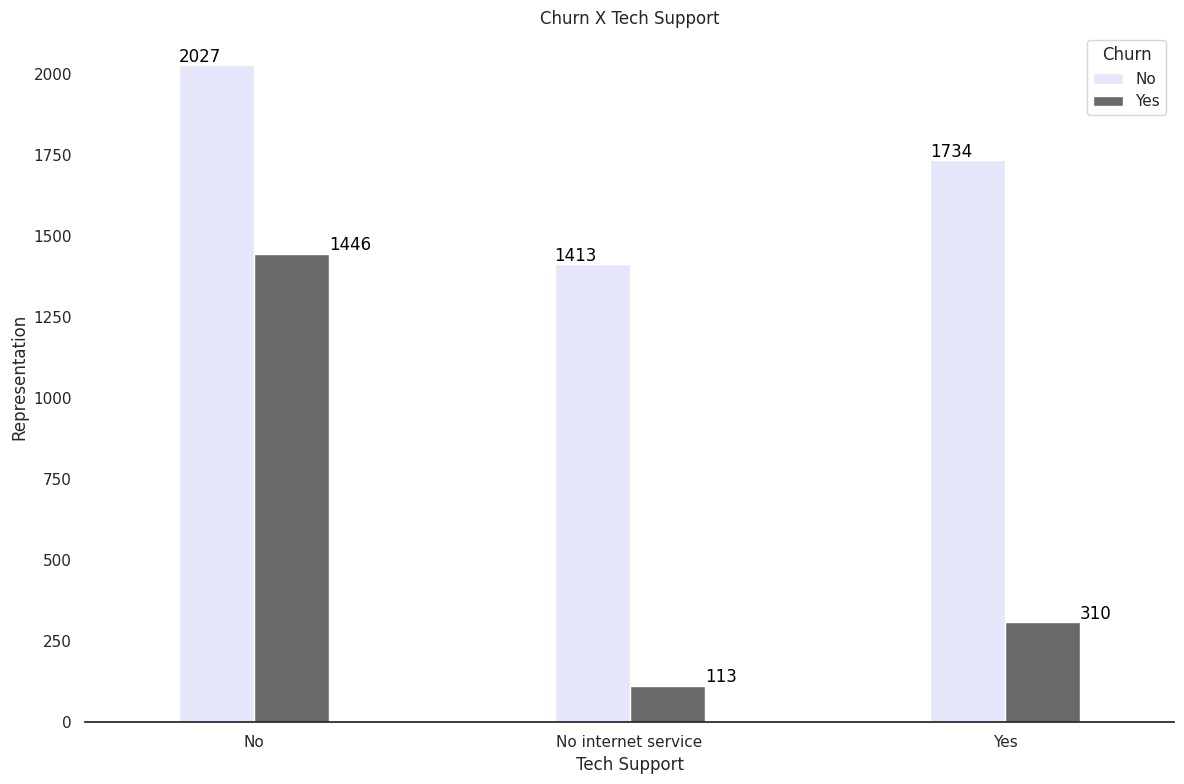

In [ ]:


# seaborn style
sns.set(style="white")

#graph plotting

techsupport_df = df.groupby(["TechSupport","Churn"]).size().unstack()
fig, ax = plt.subplots(figsize = (12,8))


techsupport_df.plot(kind='bar', stacked=False, color=['lavender', 'dimgray'], width=0.4, ax=ax)


plt.title('Churn X Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Representation')


plt.legend(title='Churn', labels=['No', 'Yes'], loc="upper right")

ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')


plt.xticks(rotation = 0)

# Adding value labels
for i, method in enumerate(techsupport_df.index):
    plt.text(i - 0.2, techsupport_df.loc[method, 0] + 10, str(techsupport_df.loc[method, 0]), color='black')
    plt.text(i + 0.2, techsupport_df.loc[method, 1] + 10, str(techsupport_df.loc[method, 1]), color='black')

plt.tight_layout()



This information we previously deduced and with this graph it proves to be true.

The line of customers `that got a higher churn rate` are customers `without technical support.`

## Why?

Customers who have this type of service, when contracting, on average, **are already determined to remain with the company for a certain period**, and are not unstable about their decision.


And by using tech support, the company is more likely to please and strengthen the customer's bond of trust when he needs it.


So for the customer, it's a `high risk` to cancel the services of a company that has quality support when you need it, and try another company.

This is yet another barrier that weighs on the decision-making time.


Therefore, it is smart to `create promotions and situations of interest` so that more customers hire and use technical support services.


It is a type of action that can `reduce churn rates` and leverage the company's financial growth.

<left><img width="70%" src="https://img.freepik.com/vetores-gratis/investimento-financeiro-analise-de-tendencias-de-mercado-investindo-em-areas-lucrativas-com-foco-em-projetos-rentaveis-ilustracao-de-conceito-de-projeto-empresarial-de-financiamento-de-empresaria_335657-2078.jpg?w=740&t=st=1692900334~exp=1692900934~hmac=198bd9be551e5531dc97bb1695329177b2bf0743aff52673a81fed915097d0e6"></left>


In [ ]:
#Graph for visualization between Churn and some Streaming Service
#To do this, we will join the StreamingMovies and StreamingTV columns

def combine_streaming(row):
  if row["StreamingTV"] == "Yes" or row["StreamingMovies"] == "Yes":
    return "Yes"
  elif row["StreamingTV"] == "No" and row["StreamingMovies"] == "No":
    return "No"
  else:
    return "No internet service"

df["StreamingService"] = df.apply(combine_streaming, axis=1)

df["StreamingService"].head(10)

0     No
1     No
2     No
3     No
4     No
5    Yes
6    Yes
7     No
8    Yes
9     No
Name: StreamingService, dtype: object

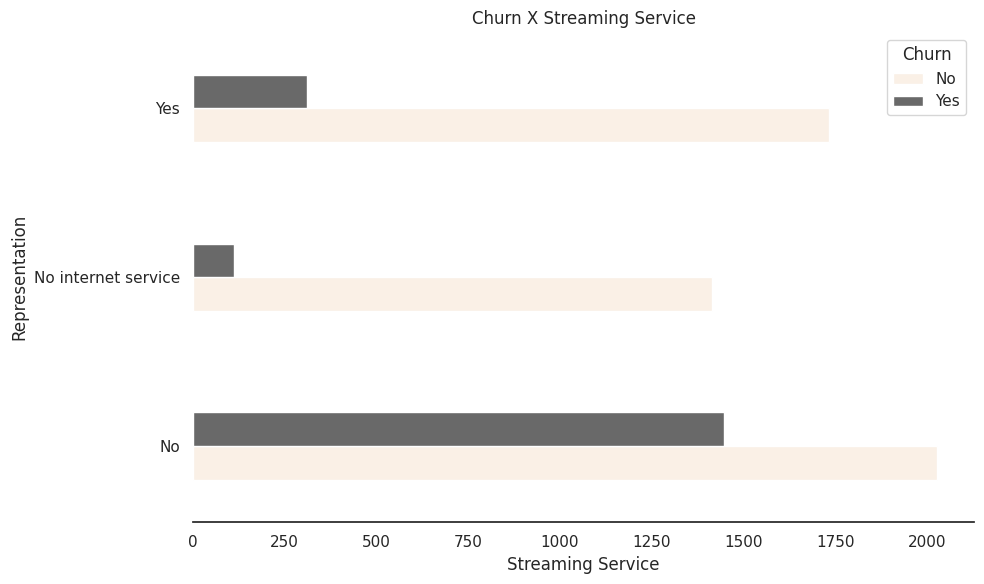

In [ ]:


# seaborn style
sns.set(style="white")

#graph plotting

streamservice_df = df.groupby(["StreamingService","Churn"]).size().unstack()
fig, ax = plt.subplots(figsize = (10,6))


techsupport_df.plot(kind='barh', stacked=False, color=['linen', 'dimgray'], width=0.4, ax=ax)


plt.title('Churn X Streaming Service')
plt.xlabel('Streaming Service')
plt.ylabel('Representation')


plt.legend(title='Churn', labels=['No', 'Yes'], loc="upper right")

ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')


plt.xticks(rotation = 0)

# # Adding value labels
# for i, method in enumerate(streamservice_df.index):
#     plt.text(i - 0.2, streamservice_df.loc[method, 0] + 10, str(streamservice_df.loc[method, 0]), color='black')
#     plt.text(i + 0.2, streamservice_df.loc[method, 1] + 10, str(streamservice_df.loc[method, 1]), color='black')

plt.tight_layout()



**Most of the company's customers do not have any streaming service offered by the company.**


However, it is easy to see the difference between `customers who churn`, those who have this service and those `who do not.`


Once again, a customer who does not have a wide range of services from the company, `it is easier to cancel services.`

<left><img width="70%" src="https://images.unsplash.com/photo-1560169897-fc0cdbdfa4d5?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2072&q=80"></left>

We identified that customers **who did not subscribe to any type of streaming** had a much **higher churn rate** than customers who use this type of service.



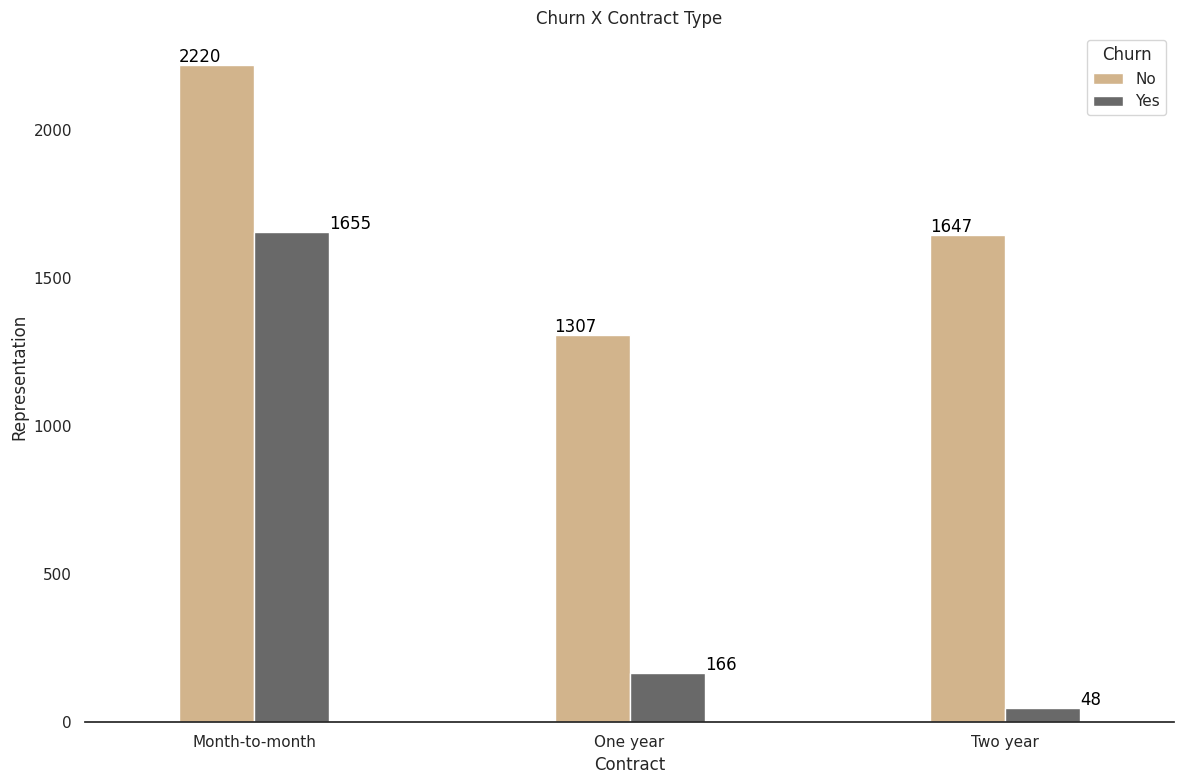

In [ ]:


# seaborn style
sns.set(style="white")

#graph plotting

contract_df = df.groupby(["Contract","Churn"]).size().unstack()
fig, ax = plt.subplots(figsize = (12,8))


contract_df.plot(kind='bar', stacked=False, color=['tan', 'dimgray'], width=0.4, ax=ax)


plt.title('Churn X Contract Type')
plt.xlabel('Contract')
plt.ylabel('Representation')


plt.legend(title='Churn', labels=['No', 'Yes'], loc="upper right")

ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')


plt.xticks(rotation = 0)

# Adding value labels
for i, method in enumerate(contract_df.index):
  plt.text(i - 0.2, contract_df.loc[method, 0] + 10, str(contract_df.loc[method, 0]), color='black')
  plt.text(i + 0.2, contract_df.loc[method, 1] + 10, str(contract_df.loc[method, 1]), color='black')

plt.tight_layout()



We observe that short contracts for contracted services are quite common.
However, we can analyze the differences based on the `proportions` between **active customers and customers who have canceled.**


The proportion of these clients within the classes with longer-term contracts is much smaller, with the majority `(1655)` with month-to-month contracts, and a very small number of just `(48)` customers with contracts longer than 1 year.

<left><img width="70%" src="https://img.freepik.com/fotos-gratis/belo-conceito-de-mudanca-de-horario-de-primavera_23-2149318300.jpg?w=996&t=st=1693245890~exp=1693246490~hmac=6dfda9fb45a3fd8d8cece9876730bd91ab8849b9286c61e1456df84cca13eeb5"></left>

The explanation can be related to aspects that we identified earlier.

A customer who is willing to form a `long-term contract` is unlikely to be dissatisfied with the service and is **unstable about his decision.**

A customer who only has a `month-to-month` contract can cancel the subscription at any time.

Monthly value of churn customers:
 $139,130.85 


Monthly value of customers who did not churn:
 $316,985.75 



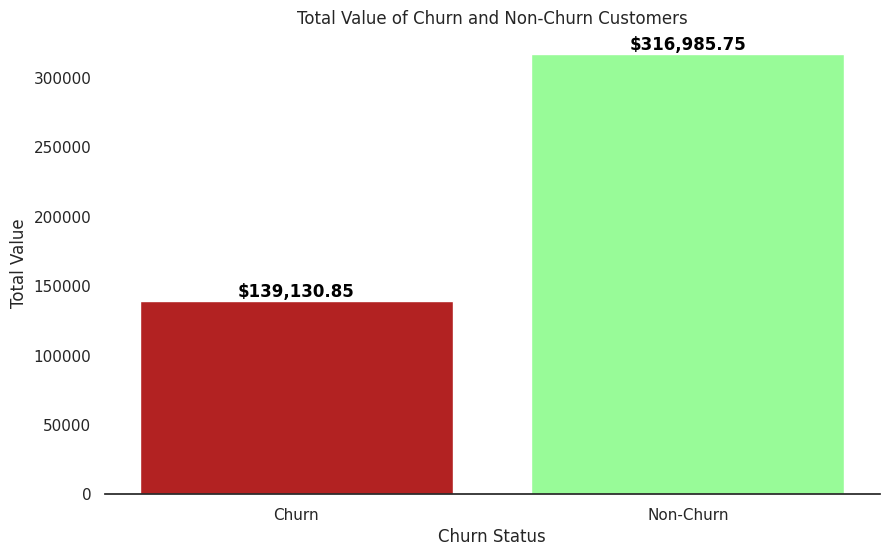

In [ ]:

# Set locale for currency formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')



# Calculating the total value of churn customers
churned_customers = df[df['Churn'] == 1]
total_churned_value = churned_customers['MonthlyCharges'].sum()

non_churned_customers = df[df['Churn'] == 0]
total_non_churned_value = non_churned_customers['MonthlyCharges'].sum()

# Formatting values as currency
formatted_total_churned_value = locale.currency(total_churned_value, grouping=True)
formatted_total_non_churned_value = locale.currency(total_non_churned_value, grouping=True)


print("Monthly value of churn customers:\n", formatted_total_churned_value,"\n\n")
print("Monthly value of customers who did not churn:\n", formatted_total_non_churned_value,"\n")


labels = ['Churn', 'Non-Churn']
values = [total_churned_value, total_non_churned_value]

fig, ax = plt.subplots(figsize=(10, 6))

bars = plt.bar(labels, values, color=['firebrick', 'palegreen'])

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, locale.currency(yval, grouping=True), ha='center', va='bottom', color='black', fontweight='bold')

# Removing top, right, and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Total Value of Churn and Non-Churn Customers")
plt.xlabel("Churn Status")
plt.ylabel("Total Value")

plt.show()


Above we have a financial representation of the costs that a high churn rate represents for a company.

**Month after month**, these amounts are lost, no longer received and most of these customers could not have left if some measures were taken in advance with the prediction of churn potential customers.

An amount of `$139,130.85` that the company no longer receives from former paying customers of the company.

And as is common knowledge in the business world,` it is cheaper to keep a customer who is already in your base`, who already subscribes to your services and is used to consuming from your company, than to convince an outsider to become a customer.

<left><img width="50%" src="https://img.freepik.com/vetores-gratis/ilustracao-do-conceito-de-receita_114360-2803.jpg?w=740&t=st=1693251963~exp=1693252563~hmac=dcc090cf2a0f554e09b1990119b830b831323f2be80afb614f74c3f7da4ac4ff"></left>

In addition to **lost monthly money**, the costs involved with marketing, campaign deployment and new registrations are also difficult costs to account for.

It is much more interesting to use time and resources to direct efforts to `reduce the churn rate`. These measures can represent an **immediate improvement in revenue**, and better `financial health` for the company.

#**Data preparation**

After the `exploratory analysis` performed, we have a better understanding of the context of the data and the **functions of each variable** within the database.

We understand the `most important` and `most impactful` ones in our analysis, and those that are not relevant to evaluate business strategies related to `customer churn rate.`

<left><img width="50%" src="https://img.freepik.com/vetores-gratis/conceito-de-ilustracao-de-relatorio-de-dados_114360-883.jpg?w=740&t=st=1693252490~exp=1693253090~hmac=aa4295e6243608f58e330ae3c700a1c4c8a2c65d9150e388557f2c2f13a15955"></left>

In this way, in order to be able to prepare for the future, we will create a predictive `Machine Learning model`, prepared to identify likely churn customers.

Having this type of information at first hand will be essential `for decision making by the strategic team`, in order to take actions that avoid this type of problem and improve the company's overall rate, as well as its total revenue and customer satisfaction. .

For this to be done in the best way, it is strictly necessary that the data be presented in a way that the model can `read, understand and interpret.`

In this way, we can use several methods, such as:

`--> Label Enconder <--`

`--> One Hot Enconder <-- `


These two methods are included in the **SciKit Learn** libraries, and we use this type of encoder to transform `categorical variables` into `numerical variables`, and in this way, our model will be able to understand and interpret the data in a better way.

If you would like to understand better about these two methods;

- **[Here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)** is the documentation for Label Encoder

- **[Here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)** is the documentation for One Hot Encoder



In [ ]:
#pre-processing variables
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(["int", "float"]).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

df_proc = df_clean.copy()

le = LabelEncoder()
for i in binary_var:
  df_proc[i] = le.fit_transform(df_proc[i])

df_proc = pd.get_dummies(df_proc, columns=cat_var)


# Let's check how the new dataframe looks like
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


Above we see the result after passing the `Label Encoder`, and it is possible to verify the **variables that were transformed.**

For example, in the gender column where previously there were; `"Male"`, `"Female"`, which were transformed into `"0"` and `"1"`, and similarly with the other variables.

With the `database information ready`, we can prepare our predictive model.

# **Prediction model in Machine Learning**

In [ ]:
#Separate data between feature matrix and target vector
X = df_proc.drop("Churn", axis=1)
y = df_proc["Churn"]

#Split the dataset between training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y)

`Cross-validation` will be used to estimate the error of the baseline and the initial models. To facilitate and improve the code, a `val_model` function was created.

The metric used for evaluation will be `recall`.

In [ ]:
def val_model (X, y, clf, quite=False):
  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, scoring = "recall")

  if quite == False:
    print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()


For baseline values, we use `Random Forest` on the training data.

At this time, no optimization or change in the learning parameters will be performed.

In [ ]:
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.48 (+/- 0.02)


In [ ]:
#standardize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#**Optimization of Hyperparameters**

e**X**treme **G**radient **Boost**ing - `XGBoost`, is one of the leading algorithms used by data scientists, especially when the data being worked on is `structured data`.

Its features allow working with a **wide variety of data types**.


It represents an algorithm category based on `Decision Trees` with `Gradient Boosting.`

Within these algorithms, customization and tuning of parameters is essential for a model with **superior performance**.

`XGBoost` has a number of possibilities for improving parameters, some affect the model more, and others are not very relevant.

To proceed, let's define the `learning rate` and the `number of estimators`, perform tuning of other parameters and, in the end, check other learning rates.



In [ ]:
xgb = XGBClassifier (learning_rate=0.001)

param_grid = {
    "n_estimators":range(0,1000,50),
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring = "recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print("Best: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.7873426425473394 for {'n_estimators': 400}


We then identify the value of `400` for the `n_estimators`

In [ ]:
xgb = XGBClassifier (learning_rate=0.001,
                     )

param_grid = {
    "max_depth":range(1,8,1),
    "min_child_weight":range (1,5,1)
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring = "recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print("Best: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.8868844984802431 for {'max_depth': 1, 'min_child_weight': 1}


We found the best result for `max_depth = 1` and `min_child_weight = 1`

In [ ]:
xgb = XGBClassifier (n_estimators=400,
                     max_depth=1,
                     min_child_weight=1)

param_grid = {
    "learning_rate":[0.001, 0.01, 0.1, 1]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring = "recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print("Best: {} for {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.881880781089414 for {'learning_rate': 0.001}



We went back to `learning_rate` with the other configured parameters and found the ideal value of `0.001`.

A lower learning rate gave us a superior result considering the `recall` value being the most important.

After configuring the **hyperparameters**, we will perform the training on the complete `training dataset`, which had no previous contact with the model. At that moment, the model will have contact with this dataset **for the first time.**

<left><img width="80%" src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg"></left>


After the model, we can `check the results` and compare its performance with the aid of a `confusion matrix`, where:

`-> TN: True Negative, results that appear to be negative and actually are.`

`-> FP: False Positive, results that are presented as positive but in reality are not.`

`-> FN: False Negative, results that are presented as negative but in reality are not.`

`-> TP: True Positive, results that are presented as positive and really are.`

              precision    recall  f1-score   support

           0       0.93      0.58      0.72      1280
           1       0.44      0.89      0.59       481

    accuracy                           0.67      1761
   macro avg       0.69      0.74      0.66      1761
weighted avg       0.80      0.67      0.68      1761

AUC: 0.7366



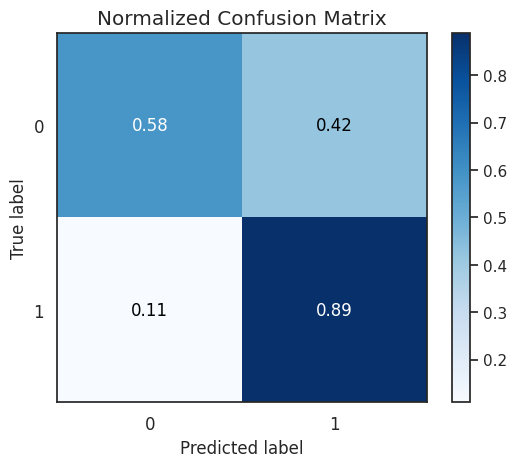

In [ ]:
#instantiate models
xgb = XGBClassifier(learning_rate = 0.001,
                    n_estimators = 400,
                    max_depth = 1,
                    min_child_weight = 1)

xgb.fit(X_train_rus, y_train_rus)

#make the prediction
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

plot_confusion_matrix(y_test, y_pred, normalize = True)

plt.show()


#**Conclusions**


<left><img width="70%" src="https://images.pexels.com/photos/2599244/pexels-photo-2599244.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"></left>

Initially our considered baseline was with `RandomForest` with a recall value of `0.48.`

Compared to our `XGBoost` model, with hyperparameter tuning, we achieved the `0.89 recall` mark.

There is still room for **new improvements and methods**, but the superiority of the model is clear compared to the `baseline`, and the importance of `improving hyperparameters`.

The correct handling of these parameters will directly affect your model, and with the correct modifications, your model will be **far superior to base models.**